In [34]:
#import libraries we'll be using
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import datetime as dt # date time

In [35]:
#read the csv file an preview it
daily_activiy = pd.read_csv(r'C:/Users/jera2/OneDrive/Escritorio/CasoPractico2/database/dailyActivity_merged.csv')
daily_activiy.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [36]:
#lets check Nulls
nulls = daily_activiy.isnull().sum()
nulls

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [37]:
#Now lets check the data type to see if it makes sense
daily_activiy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
Id                          940 non-null int64
ActivityDate                940 non-null object
TotalSteps                  940 non-null int64
TotalDistance               940 non-null float64
TrackerDistance             940 non-null float64
LoggedActivitiesDistance    940 non-null float64
VeryActiveDistance          940 non-null float64
ModeratelyActiveDistance    940 non-null float64
LightActiveDistance         940 non-null float64
SedentaryActiveDistance     940 non-null float64
VeryActiveMinutes           940 non-null int64
FairlyActiveMinutes         940 non-null int64
LightlyActiveMinutes        940 non-null int64
SedentaryMinutes            940 non-null int64
Calories                    940 non-null int64
dtypes: float64(7), int64(7), object(1)
memory usage: 110.2+ KB


We can aprecciate some interesting facts. First, we are able to see our columns names and their types. 
It looks like 'ActivityDate' got a objet type which is not aproppiate for our goals.
Finally, it seems there is no any null value, so its not necessary to drop any data row.


In [38]:
#Lets convert activitydate type to datatime64 format mm/dd/yyyy
daily_activiy['ActivityDate'] = pd.to_datetime(daily_activiy['ActivityDate'], format="%m/%d/%Y")
daily_activiy.head() 

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [39]:
#Just to verify
daily_activiy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
Id                          940 non-null int64
ActivityDate                940 non-null datetime64[ns]
TotalSteps                  940 non-null int64
TotalDistance               940 non-null float64
TrackerDistance             940 non-null float64
LoggedActivitiesDistance    940 non-null float64
VeryActiveDistance          940 non-null float64
ModeratelyActiveDistance    940 non-null float64
LightActiveDistance         940 non-null float64
SedentaryActiveDistance     940 non-null float64
VeryActiveMinutes           940 non-null int64
FairlyActiveMinutes         940 non-null int64
LightlyActiveMinutes        940 non-null int64
SedentaryMinutes            940 non-null int64
Calories                    940 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(7)
memory usage: 110.2 KB


In [40]:
#Lets change activityDate name
dic = {'ActivityDate' : 'date'}
daily_activiy.rename(columns=dic, inplace=True)
daily_activiy.head()

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [41]:
#I'll add some new columns called weekday, total minutes and hours in order to use them in future analysis
new_col = ['Id', 'date', 'WeekDay', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalMinutes', 'TotalHours', 'Calories']

data = daily_activiy.reindex(columns=new_col)

data.head()

,Id,date,WeekDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [42]:
#Now, add the date day by dt.day_name
data['date'].dt.day_name().head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: date, dtype: object

In [43]:
data['WeekDay']=data['date'].dt.day_name()
data.head(5)

,Id,date,WeekDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


We'll add all the column minutes to treat them as a whole, without considering sedentary time spent

In [44]:
data['TotalMinutes']=data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] 
data['TotalMinutes'].head()

0    366
1    257
2    222
3    272
4    267
Name: TotalMinutes, dtype: int64

In [45]:
#Now, I'll convert them to hours
data['TotalMinutes']/60
data['TotalHours']=data['TotalMinutes']/60


In [46]:
#A final view before get into data analysis
data.head(10)

,Id,date,WeekDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,366,6.100000,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,257,4.283333,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,222,3.700000,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,272,4.533333,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,267,4.450000,1863
5,1503960366,2016-04-17,Sunday,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,222,3.700000,1728
6,1503960366,2016-04-18,Monday,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,291,4.850000,1921
7,1503960366,2016-04-19,Tuesday,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,345,5.750000,2035
8,1503960366,2016-04-20,Wednesday,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,245,4.083333,1786
9,1503960366,2016-04-21,Thursday,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,238,3.966667,1775


# ANALYSIS

Text(0.5,1,'Calories burned per steps')

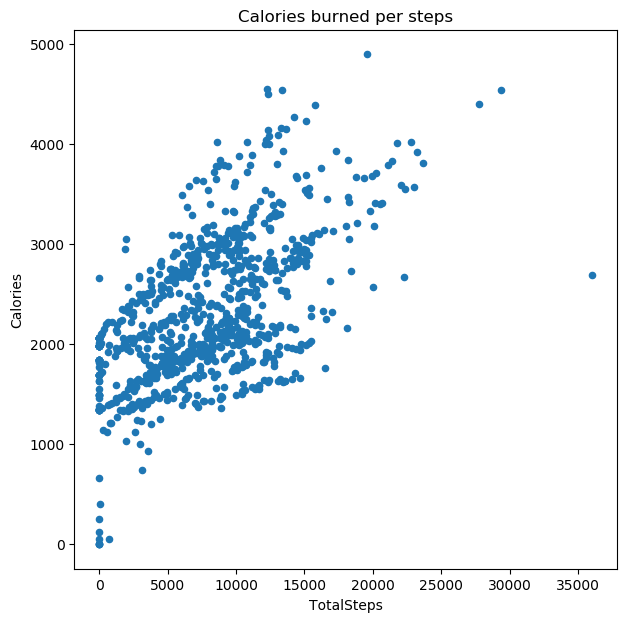

In [47]:
scatter_plot = data.plot.scatter(x='TotalSteps', y='Calories', figsize=(7,7))
scatter_plot.set_title('Calories burned per steps')

We can appreciate there is somo kind of positive correlation between calories burned and total steps. In this context, calories burned amount increases very fast as steps go from 0 to 14,000. After this interval, it increases slower. 

In [48]:
#Lets check correlation value
data[['TotalSteps','Calories']].corr()

,TotalSteps,Calories
TotalSteps,1.000000,0.591568
Calories,0.591568,1.000000


In [49]:
#We could verify this fact taking just more than 15,000 totalsteps and see what happens to correlation value
copy = data[['TotalSteps','Calories']]
copy[copy.TotalSteps > 15000].corr()

,TotalSteps,Calories
TotalSteps,1.000000,0.345173
Calories,0.345173,1.000000


Text(0.5,1,'Calories burned per steps')

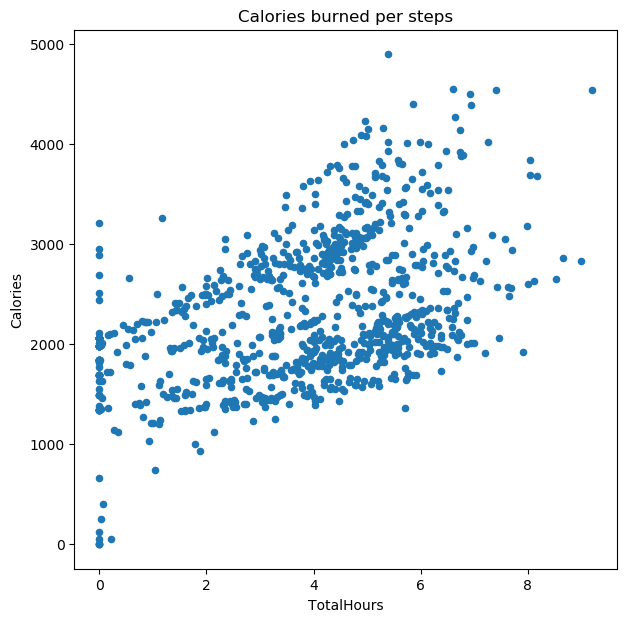

In [50]:
scatter_plot = data.plot.scatter(x='TotalHours', y='Calories', figsize=(7,7))
scatter_plot.set_title('Calories burned per hour')


Text(0.5,1,'Calories burned vs very active exercise minutes')

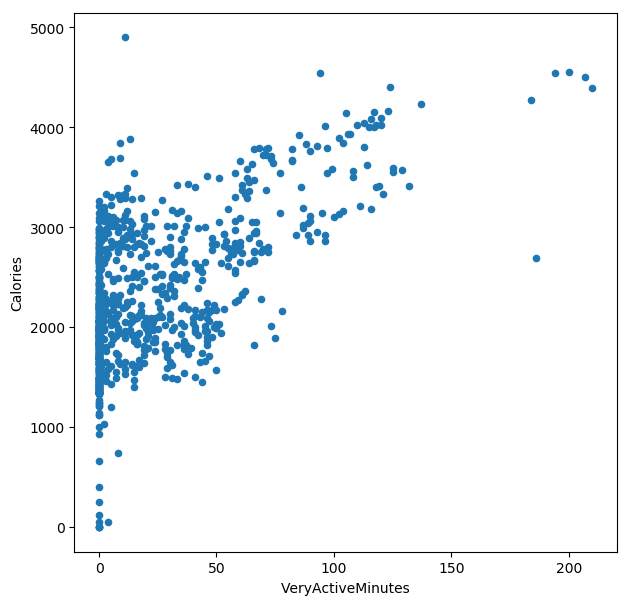

In [51]:
#Lets see what happens just considering very active exercise minutes 
scatter_plot1 = data.plot.scatter(x='VeryActiveMinutes', y='Calories', figsize=(7,7))
scatter_plot.set_title('Calories burned vs very active exercise minutes')

We can see there is a interesting correlation which can be proven by corr method

In [52]:
data[['VeryActiveMinutes','Calories']].corr()

,VeryActiveMinutes,Calories
VeryActiveMinutes,1.000000,0.615838
Calories,0.615838,1.000000


Now lets take a look in weekday column to see how often devices are being used

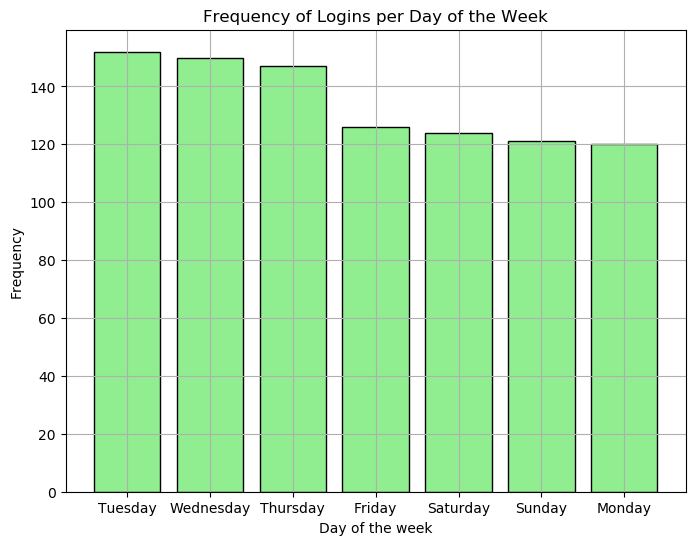

In [53]:
import matplotlib.pyplot as plt

# Datos
dayf = data.groupby('WeekDay').size()

# Días de la semana en el orden deseado
dias_semana = ["Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday"]

# Reordenar los valores en base al orden de días de la semana
dayf = dayf.reindex(dias_semana)

# Crear la figura
plt.figure(figsize=(8, 6))

# Crear la gráfica de barras
plt.bar(dias_semana, dayf, color="lightgreen", edgecolor="black")

# Agregar etiquetas y título
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("Frequency of Logins per Day of the Week")

# Mostrar el gráfico
plt.grid(True)
plt.show()

We can certainly see users track their activity on the app more from tuesdy untill thursady, then its use decreases

Now lets take a look in how much time people use the app to diferent kind of activities:

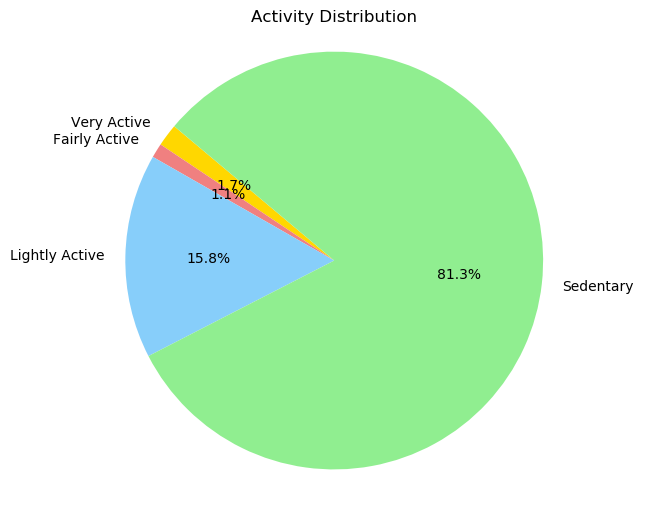

In [54]:
import matplotlib.pyplot as plt

# Datos
very_active = data["VeryActiveMinutes"].sum()
fairly_active = data["FairlyActiveMinutes"].sum()
lightly_active = data["LightlyActiveMinutes"].sum()
sedentary = data["SedentaryMinutes"].sum()

# Etiquetas para las categorías
categorias = ["Very Active", "Fairly Active", "Lightly Active", "Sedentary"]

# Valores para cada categoría
valores = [very_active, fairly_active, lightly_active, sedentary]

# Crear la figura
plt.figure(figsize=(8, 6))

# Crear la gráfica de pastel
plt.pie(valores, labels=categorias, autopct="%1.1f%%", colors=["gold", "lightcoral", "lightskyblue", "lightgreen"], startangle=140)

# Agregar título
plt.title("Activity Distribution")

# Mostrar el gráfico
plt.axis("equal")
plt.show()


We are able to visualize that people use the app most of the time (82%) for sedentary activities instead of using it for exercise activities. 